In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# load data
X, y = load_iris(return_X_y=True)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 第一步，观察数据
### 1. 目的
1. 观察数据可以发现，通过当前的特征能否对鸢尾花类型进行区分，这就决定了，是否能使用机器学习方法实现目的，或当前的特征值是不是合理的，如果特征值不能区分，则需要寻找更多的有效特征值
2. 观察数据还可以发现离群点/异常值，从而对异常值进行屏蔽，使后续的模型更有效
### 2.方式
绘制散点图，两两观察特征

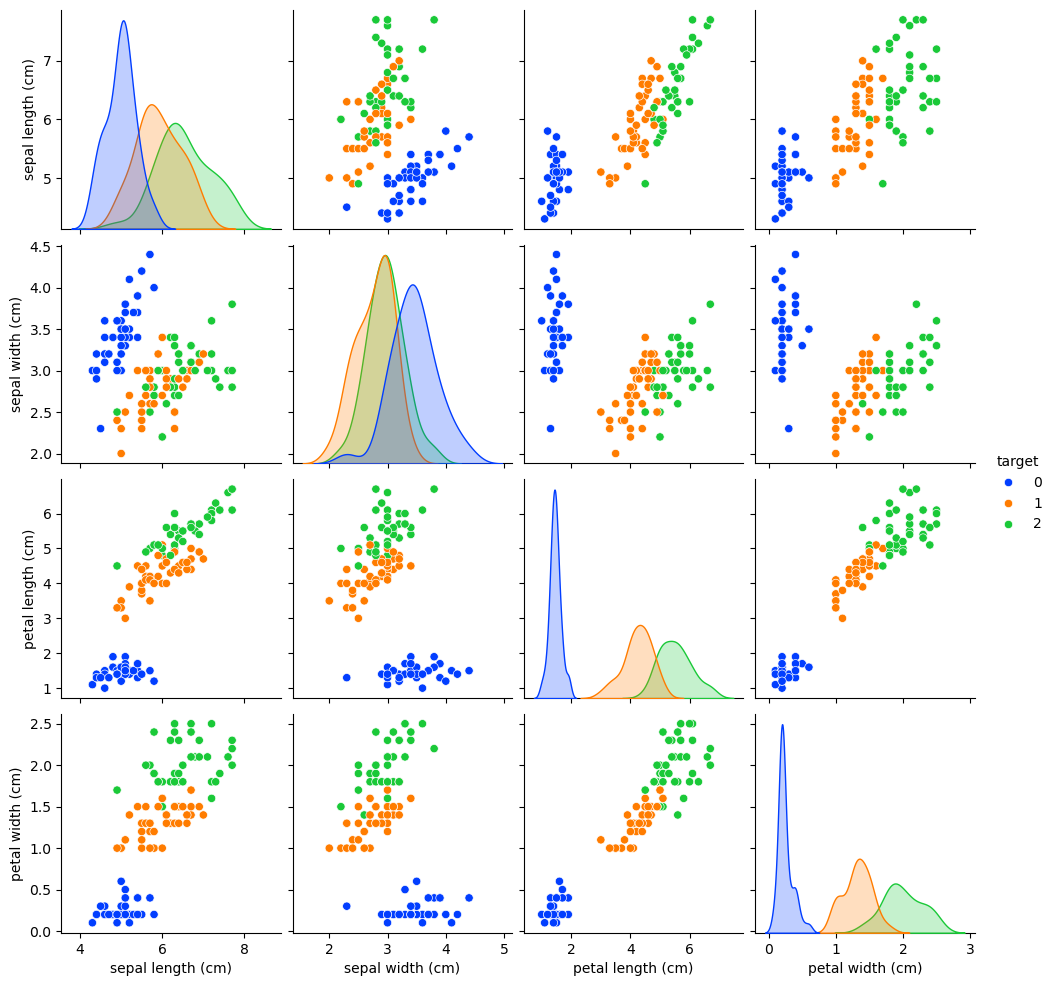

In [9]:
# observation the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 把数据加载为dataframe格式方便实用sns
iris_df = pd.DataFrame(X_train, columns=load_iris().feature_names)
iris_df['target'] = y_train

# 使用seaborn.pairplot绘制所有特征散点图（及分布图)
sns.pairplot(iris_df,hue='target',markers=['o','o','o'], palette='bright')
plt.show()

# 显示图形
plt.show()

通过观察可以发现，当前的4个特征值，基本可以把3种类型区分开

## 构建第一个模型:KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# 实例化一个对象
knn = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

## 做出预测

In [20]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [21]:
pred = knn.predict(X_new)
print(pred)

[0]


## 评估模型

In [22]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [23]:
print(f"the accuracy is {(y_test == y_pred).mean()}")

the accuracy is 1.0


In [24]:
print(knn.score(X_test, y_test))

1.0
